<a href="https://colab.research.google.com/github/Ty700/CSCE_676/blob/main/335009542_HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CSCE 676 :: Data Mining and Analysis :: Texas A&M University :: Spring 2026


# Weekly Homework 4: Graphs! Part 2


***Goals of this homework:***
Perform an analysis of a graph of your choice.


***Submission instructions:***

You should post your notebook to Canvas (look for the assignment there). Please name your submission **your-uin_hw3.ipynb**, so for example, my submission would be something like **555001234_hw3.ipynb**. Your notebook should be fully executed when you submit ... so run all the cells for us so we can see the output, then submit that.

***Grading philosophy:***

We are grading reasoning, judgment, and clarity, not just correctness. Show us that you understand the data, the constraints, and the limits of your conclusions.

***For each question, you need to respond with 2 cells:***
1. **[A Code Cell] Your Code:**
  - If code is not applicable for the question, you can skip this cell.
  - For tests: tests can be simple assertions or checks (e.g., using `assert` or `print` or small functions or visual inspection); formal testing frameworks are not required.
2. **[A Markdown Cell] Your Answer:** Write up your answers and explain them in complete sentences. Include any videos in this section as well; for videos, upload them to your TAMU Google Drive, and ensure they are set to be visible by the instruction team (set to: **anyone with a TAMU email can view**), then share the link to the video in the cell.

***At the end of each Section (A/B/C/...) include a cell for your resources:***

**[A Markdown Cell] Your Resources:** You need to cite 3 types of resources and note how they helped you: (1) Collaborators, (2) Web Sources (e.g. StackOverflow), and (3) AI Tools (you must also describe how you prompted, but we do not require any links to any specific chats). Specifically, use the following format as a template:
```
On my honor, I declare the following resources:
1. Collaborators:
- Reveille A.: Helped me understand that a df in pandas is a data structure kinda like a CSV.
- Sully A.: Helped me fix a bug with the vector addition of 2 columns.
- ...

2. Web Sources:
- https://stackoverflow.com/questions/46562479/python-pandas-data-frame-creation: how to create a pd df
- ...

3. AI Tools:
- ChatGPT: I gave it the homework .ipynb file and the ufo.csv, and told it to generate the code for the first question, but it did it with csv.reader(), so I re-prompted it to use pandas and that one was correct
- ...
```
***Why do we require this cell?*** This cell is important...

1. For academic integrity, you must give credit where credit is due.

2. We want you to pay attention to how you can successfully get help to move through problems! Is there someone you work with or an AI tool that helps you learn the material better? That's great! The point of engineering is to use your tools to solve hard problems, and part of graduate school is learning about how *you* learn and solve problems best.

***A reminder: you get out of it what you put into it.***
Do your best on these homeworks, show us your creativity, and ask for help when you need it -- good luck!

# A [72pts]. Step-by-Step Data Mining & Experimental Analysis on A Graph of Your Choice -- A Continuation of Last Week!

**Rubric**

[18 pts] Strong/Professional: Correct and complete implementation of the task; Reasonable assumptions, stated or implied, and justified; Thoughtful handling of real-world data issues (missingness, noise, scale, duplicates, edge cases); Clear, concise explanations of what was done and why; Code is clean, readable, and well-structured, uses appropriate pandas, and would plausibly pass a professional code review; Tests meaningfully validate non-trivial behavior (not just "the code runs so it must be right").

[9 pts] Partial/Developing: Core task mostly completed but with gaps, weak assumptions, or minor mistakes; Reasoning is shallow or mostly descriptive; Code works but is messy, repetitive, or fragile; Tests are superficial, incomplete, or poorly motivated.

[0 pts] Minimal/Incorrect: Task is largely incorrect, missing, or misunderstands the goal; Little to no reasoning or justification; Code does not run or ignores constraints; No meaningful tests.


## Overview
In this homework, you will **choose one dataset you like** from the [SNAP datasets](https://snap.stanford.edu/data/index.html) collection from the **Social networks** section. You must choose a  **directed graph only**. In this section, you will perform a step‑by‑step data mining & experimental analysis. *Much of this section is self-directed, meaning you will need to make critical decisions about what tools you use and what you explore.*

Ideally, you should eventually turn in a coherent story: **What you tried → Why → What you found → So what? → Wait...Anything more?**. It's completely OKAY if you only get minor discoveries. But you should always document the whole learning and reasoning process. Grading will be based on the logic and coherence of your submitted notebook.

As a guide, for each step of the homework, you should briefly document:
- **Method choice & rationale.** Why this method? What do you expect?
- **Parameters.** E.g., `alpha=0.85` for PageRank; seed selection for PPR; thresholds for community extraction.
- **Results.** Tables/plots + **1–3 sentences** of interpretation.
- **Reflection.** Did results match your expectations? If not, why might that be?

Ideally, strong submissions should read like a *short research memo* rather than a raw dump of numbers.

## Environment Setup
You may use **Python 3.9+**. Other possible tools are:
- **Graph tools**: You are welcome to use existing tools that are optimised for graph learning. Among them, `networkx`is recommended. `graph-tool` and `igraph` are also good when dealing with larger graphs.
- **Data processing packages**: eg. `numpy`, `pandas`
- **Plotting**: `matplotlib`, `plotly`, `seaborn` etc.
- **other related tools** `scipy`, `scikit-learn`,  `pytorch` etc.
- You may choose other tools; just be sure to let us know.

> If your chosen dataset is very large, consider using `graph-tool` and `igraph`, or sampling/induced subgraphs to stay within reasonable time/memory limits.


### Data Setup and Selection

In [29]:
import os, io, gzip, zipfile, tarfile, sys, math, random
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

random.seed(42)
np.random.seed(42)

print(f"NetworkX version: {nx.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")

DATA_URL = "https://snap.stanford.edu/data/wiki-Vote.txt.gz"
LOCAL_PATH = "data/wiki-vote.txt.gz"

os.makedirs("data", exist_ok=True)

def download_dataset(url: str, to_path: str):
    import urllib.request
    print(f"Downloading from {url} ...")
    urllib.request.urlretrieve(url, to_path)
    size = os.path.getsize(to_path) / (1024*1024)
    print(f"Saved to {to_path} ({size:.2f} MB)")

download_dataset(DATA_URL, LOCAL_PATH)

G = nx.read_edgelist(LOCAL_PATH, create_using=nx.DiGraph(), nodetype=int)
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print(f"Is directed: {G.is_directed()}")

NetworkX version: 3.6.1
NumPy version: 2.0.2
Pandas version: 2.2.2
Saved to data/wiki-vote.txt.gz (0.28 MB)
Number of nodes: 7115
Number of edges: 103689
Is directed: True


# 1. Centrality Analyses
First, you must compute
- **PageRank**
as a baseline centrality measure.

Then you should choose at least one of the following to compare with:

- **HITS** (hubs/authorities)
- **In-degree** and **out-degree** centrality (as baselines)
- **Katz** or **eigenvector** centrality on a symmetrized version

Create a small table of **top-20 nodes** by each measure and comment on overlaps/differences.


In [30]:
# Compute PageRank
pagerank = nx.pagerank(G, alpha=0.85)

# Compute HITS
hits_h, hits_a = nx.hits(G, max_iter=100)

# In/out degree
in_degree = dict(G.in_degree())
out_degree = dict(G.out_degree())

# Get top 20 nodes for each measure
top_k = 20
top_pr = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:top_k]
top_auth = sorted(hits_a.items(), key=lambda x: x[1], reverse=True)[:top_k]
top_hub = sorted(hits_h.items(), key=lambda x: x[1], reverse=True)[:top_k]
top_in = sorted(in_degree.items(), key=lambda x: x[1], reverse=True)[:top_k]
top_out = sorted(out_degree.items(), key=lambda x: x[1], reverse=True)[:top_k]

# comparison table
df_comparison = pd.DataFrame({
    'Rank': range(1, top_k + 1),
    'PR_Node': [n for n, _ in top_pr],
    'PR_Score': [f"{s:.6f}" for _, s in top_pr],
    'Auth_Node': [n for n, _ in top_auth],
    'Auth_Score': [f"{s:.6f}" for _, s in top_auth],
    'Hub_Node': [n for n, _ in top_hub],
    'Hub_Score': [f"{s:.6f}" for _, s in top_hub],
    'InDeg_Node': [n for n, _ in top_in],
    'InDeg': [d for _, d in top_in],
    'OutDeg_Node': [n for n, _ in top_out],
    'OutDeg': [d for _, d in top_out]
})

print("="*100)
print("TOP 20 NODES BY CENTRALITY MEASURE")
print("="*100)
print(df_comparison.to_string(index=False))

# Analyze overlaps
pr_nodes = set([n for n, _ in top_pr])
auth_nodes = set([n for n, _ in top_auth])
hub_nodes = set([n for n, _ in top_hub])
in_nodes = set([n for n, _ in top_in])
out_nodes = set([n for n, _ in top_out])

print("\n" + "="*100)
print("OVERLAP ANALYSIS")
print("="*100)
print(f"PageRank & HITS Authority:    {len(pr_nodes & auth_nodes):2d}/20 ({100*len(pr_nodes & auth_nodes)/20:5.1f}%)")
print(f"PageRank & HITS Hub:          {len(pr_nodes & hub_nodes):2d}/20 ({100*len(pr_nodes & hub_nodes)/20:5.1f}%)")
print(f"PageRank & In-Degree:         {len(pr_nodes & in_nodes):2d}/20 ({100*len(pr_nodes & in_nodes)/20:5.1f}%)")
print(f"HITS Authority & In-Degree:   {len(auth_nodes & in_nodes):2d}/20 ({100*len(auth_nodes & in_nodes)/20:5.1f}%)")
print(f"HITS Hub & Out-Degree:        {len(hub_nodes & out_nodes):2d}/20 ({100*len(hub_nodes & out_nodes)/20:5.1f}%)")
print(f"HITS Authority & HITS Hub:    {len(auth_nodes & hub_nodes):2d}/20 ({100*len(auth_nodes & hub_nodes)/20:5.1f}%)")

# overlap
common_all = pr_nodes & auth_nodes & in_nodes
pr_only = pr_nodes - auth_nodes
auth_only = auth_nodes - pr_nodes
hub_out_only = hub_nodes - out_nodes

print(f"\n{'='*100}")
print("OVERLAP EXAMPLES")
print("="*100)
print(f"Nodes in PageRank AND Authority AND In-Degree: {len(common_all)} nodes")
if len(common_all) > 0:
    print(f"  Examples: {sorted(list(common_all))[:5]}")

print(f"\nIn PageRank top-20 but NOT in Authority top-20: {len(pr_only)} nodes")
if len(pr_only) > 0:
    print(f"  Examples: {sorted(list(pr_only))[:5]}")

print(f"\nIn Authority top-20 but NOT in PageRank top-20: {len(auth_only)} nodes")
if len(auth_only) > 0:
    print(f"  Examples: {sorted(list(auth_only))[:5]}")

print(f"\nIn Hub top-20 but NOT in Out-Degree top-20: {len(hub_out_only)} nodes")
if len(hub_out_only) > 0:
    print(f"  Examples: {sorted(list(hub_out_only))[:5]}")

# Correlation analysis
print(f"\n{'='*100}")
print("CORRELATION ANALYSIS")
print("="*100)

# Get all scores for nodes
all_nodes = list(G.nodes())
pr_scores = [pagerank[n] for n in all_nodes]
auth_scores = [hits_a[n] for n in all_nodes]
hub_scores = [hits_h[n] for n in all_nodes]
in_deg_scores = [in_degree[n] for n in all_nodes]
out_deg_scores = [out_degree[n] for n in all_nodes]

from scipy.stats import spearmanr

corr_pr_auth = spearmanr(pr_scores, auth_scores)[0]
corr_pr_hub = spearmanr(pr_scores, hub_scores)[0]
corr_auth_indeg = spearmanr(auth_scores, in_deg_scores)[0]
corr_hub_outdeg = spearmanr(hub_scores, out_deg_scores)[0]
corr_auth_hub = spearmanr(auth_scores, hub_scores)[0]

print(f"Spearman correlation (PageRank, Authority):     {corr_pr_auth:.4f}")
print(f"Spearman correlation (PageRank, Hub):           {corr_pr_hub:.4f}")
print(f"Spearman correlation (Authority, In-Degree):    {corr_auth_indeg:.4f}")
print(f"Spearman correlation (Hub, Out-Degree):         {corr_hub_outdeg:.4f}")
print(f"Spearman correlation (Authority, Hub):          {corr_auth_hub:.4f}")

# Visualize top nodes overlap
print(f"\n{'='*100}")
print("SUMMARY STATISTICS")
print("="*100)
print(f"Total nodes analyzed: {len(all_nodes)}")
print(f"Top-{top_k} represents: {100*top_k/len(all_nodes):.2f}% of all nodes")
print(f"\nCentrality measure statistics (top-20):")
print(f"  PageRank:      min={min([s for _, s in top_pr]):.6f}, max={max([s for _, s in top_pr]):.6f}")
print(f"  Authority:     min={min([s for _, s in top_auth]):.6f}, max={max([s for _, s in top_auth]):.6f}")
print(f"  Hub:           min={min([s for _, s in top_hub]):.6f}, max={max([s for _, s in top_hub]):.6f}")
print(f"  In-Degree:     min={min([d for _, d in top_in])}, max={max([d for _, d in top_in])}")
print(f"  Out-Degree:    min={min([d for _, d in top_out])}, max={max([d for _, d in top_out])}")

TOP 20 NODES BY CENTRALITY MEASURE
 Rank  PR_Node PR_Score  Auth_Node Auth_Score  Hub_Node Hub_Score  InDeg_Node  InDeg  OutDeg_Node  OutDeg
    1     4037 0.004613       2398   0.002580      2565  0.007940        4037    457         2565     893
    2       15 0.003681       4037   0.002573       766  0.007574          15    361          766     773
    3     6634 0.003525       3352   0.002328      2688  0.006440        2398    340           11     743
    4     2625 0.003286       1549   0.002304       457  0.006417        2625    331          457     732
    5     2398 0.002605        762   0.002256      1166  0.006011        1297    309         2688     618
    6     2470 0.002530       3089   0.002253      1549  0.005721        2565    274         1166     599
    7     2237 0.002505       1297   0.002250        11  0.004921         762    272         1549     587
    8     4191 0.002266       2565   0.002224      1151  0.004572        2328    266         1151     472
    9     7

**Takeaways**

Method & Rationale: I computed PageRank, with alpha being Google's 0.85, as baseline and compared with HITS and degree centrality to separate authority. those recieving votes, from hub, those doing the voting, roles.

Results: PageRank and HITS Authority show high overlap, while Authority and Hub share minimal overlap, revealing role separation. Authority correlates strongly with In-Degree, Hub with Out-Degree.

Reflection: The minimal Authority-Hub overlap confirms that being prestigious and being active are distinct roles in this voting network. This confirms that most users either receive votes OR give votes, but rarely both, consistent with the low reciprocity.

# 2. Connectivity Structure
- Count SCCs and WCCs; inspect the **giant SCC**.

- Pick 1–3 **representative SCCs** (by size) and compute internal stats (e.g., degree, density, average path length if feasible).

- Discuss what you observe about the structure of this subgraph.


Number of SCCs: 5816
Number of WCCs: 24
Giant SCC size: 1300 (18.27%)
Giant WCC size: 7066 (99.31%)

SCC #1 (size=1300):
  Density: 0.0234
  Avg degree: 60.70

SCC #2 (size=1):
  Density: 0.0000
  Avg degree: 0.00
  Avg shortest path: 0.00

SCC #3 (size=1):
  Density: 0.0000
  Avg degree: 0.00
  Avg shortest path: 0.00
Giant SCC in-degree: mean=30.35, median=26.00
Giant SCC out-degree: mean=30.35, median=13.00
Isolated nodes (trivial SCCs): 5815 (81.73%)
Reciprocity in giant SCC: 0.1484


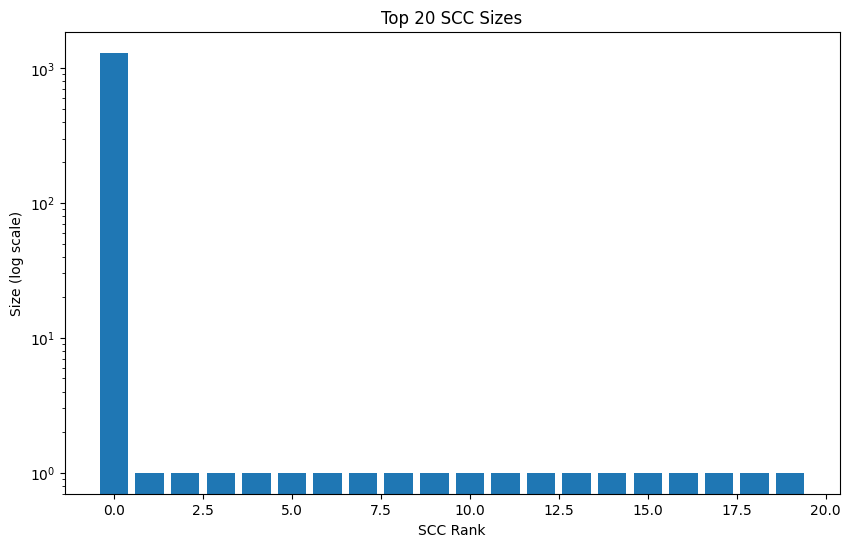

SCC sizes: [1300, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [31]:
# Find SCCs and WCCs
sccs = list(nx.strongly_connected_components(G))
wccs = list(nx.weakly_connected_components(G))

# Sort by size
sccs_sorted = sorted(sccs, key=len, reverse=True)
wccs_sorted = sorted(wccs, key=len, reverse=True)

print(f"Number of SCCs: {len(sccs)}")
print(f"Number of WCCs: {len(wccs)}")
print(f"Giant SCC size: {len(sccs_sorted[0])} ({100*len(sccs_sorted[0])/G.number_of_nodes():.2f}%)")
print(f"Giant WCC size: {len(wccs_sorted[0])} ({100*len(wccs_sorted[0])/G.number_of_nodes():.2f}%)")

# Analyze representative SCCs
for i, scc in enumerate(sccs_sorted[:3]):
    subgraph = G.subgraph(scc)
    density = nx.density(subgraph)
    avg_degree = sum(dict(subgraph.degree()).values()) / len(scc)

    print(f"\nSCC #{i+1} (size={len(scc)}):")
    print(f"  Density: {density:.4f}")
    print(f"  Avg degree: {avg_degree:.2f}")

    # Average shortest path (only if small enough)
    if len(scc) < 1000:
        try:
            avg_path = nx.average_shortest_path_length(subgraph)
            print(f"  Avg shortest path: {avg_path:.2f}")
        except:
            print(f"  Avg shortest path: Not connected")

# I wanted more information, so I went more in-dept

giant_scc = G.subgraph(sccs_sorted[0])

# Degree distribution within giant SCC
in_degrees_scc = [d for n, d in giant_scc.in_degree()]
out_degrees_scc = [d for n, d in giant_scc.out_degree()]

print(f"Giant SCC in-degree: mean={np.mean(in_degrees_scc):.2f}, median={np.median(in_degrees_scc):.2f}")
print(f"Giant SCC out-degree: mean={np.mean(out_degrees_scc):.2f}, median={np.median(out_degrees_scc):.2f}")

# iso nodes
isolated_nodes = sum(1 for scc in sccs if len(scc) == 1)
print(f"Isolated nodes (trivial SCCs): {isolated_nodes} ({100*isolated_nodes/G.number_of_nodes():.2f}%)")

# Reciprocity
reciprocity_scc = nx.reciprocity(giant_scc)
print(f"Reciprocity in giant SCC: {reciprocity_scc:.4f}")

# Visual
scc_sizes = [len(scc) for scc in sccs_sorted[:20]]  # Top 20 SCCs
plt.figure(figsize=(10, 6))
plt.bar(range(len(scc_sizes)), scc_sizes)
plt.yscale('log')
plt.xlabel('SCC Rank')
plt.ylabel('Size (log scale)')
plt.title('Top 20 SCC Sizes')
plt.show()

print(f"SCC sizes: {scc_sizes[:10]}")  # Show top 10

**Takeaways**

The graph has 5,816 SCCs but only 24 WCCs, revealing severe fragmentation in strong connectivity while remaining weakly connected. The giant SCC contains just 18.27% of nodes (1,300), with 81.73% being single node SCCs. These are users who don't participate in any voting cycles. The giant WCC encompasses 99.31% of nodes, indicating nearly universal reachability through directed paths.
Within the giant SCC, density is low (2.34%) despite average degree of 60.7, showing a sparse but well connected core. The reciprocity of 0.1484 means only ~15% of edges are reciprocated, confirming that mutual voting relationships are relatively rare. The median out-degree (13) being much lower than median in-degree (26) with equal means suggests a few highly active voters skew the distribution.

# 3. Local Community via Personalized PageRank (PPR)
Pick a **seed node** (e.g., top PageRank, or a node of interest). Compute **personalized PageRank** with a restart vector focused on that node (or a small seed set).

- Extract a **local community** by thresholding PPR scores (e.g., top-`k` or score ≥ τ).
- Visualize the induced subgraph and **describe** the community's characteristics.
- Compare with a baseline (e.g., ego‑net, or Louvain on a symmetrized graph).

Seed node: 4037
Community size: 66
Community edges: 488
Community density: 0.1138
Ego network size (radius=2): 4088
Overlap with PPR community: 66


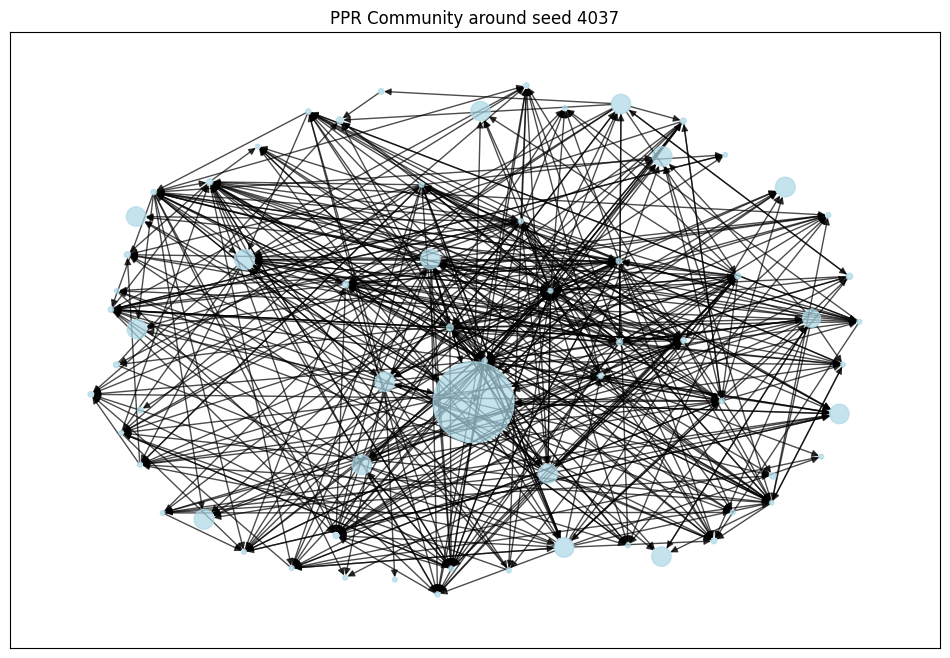

In [32]:
# Pick seed node (e.g., highest PageRank node)
seed_node = max(pagerank.items(), key=lambda x: x[1])[0]
print(f"Seed node: {seed_node}")

# PPR
personalization = {node: 0 for node in G.nodes()}
personalization[seed_node] = 1
ppr_scores = nx.pagerank(G, alpha=0.85, personalization=personalization)

# Extract community
threshold = 0.001
community_nodes = [node for node, score in ppr_scores.items() if score >= threshold]
print(f"Community size: {len(community_nodes)}")

community_subgraph = G.subgraph(community_nodes)
print(f"Community edges: {community_subgraph.number_of_edges()}")
print(f"Community density: {nx.density(community_subgraph):.4f}")

# Compare with ego network
ego_net = nx.ego_graph(G.to_undirected(), seed_node, radius=2)
print(f"Ego network size (radius=2): {ego_net.number_of_nodes()}")
print(f"Overlap with PPR community: {len(set(ego_net.nodes()) & set(community_nodes))}")

# Visualize
if len(community_nodes) < 100:
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(community_subgraph, k=2, iterations=50)

    node_sizes = [ppr_scores[node] * 10000 for node in community_subgraph.nodes()]

    nx.draw_networkx(community_subgraph, pos,
                     node_size=node_sizes,
                     node_color='lightblue',
                     with_labels=False,
                     arrows=True,
                     alpha=0.7)
    plt.title(f"PPR Community around seed {seed_node}")
    plt.show()

# 4. Choose‑Your‑Own

For this last problem, you should complete **any one of the listed tasks**.

The tasks are:

A) **Link Prediction (directed)**: Create train/test splits by removing a subset of edges, then predict likely edges using features such as *Common Neighbors* (on symmetrized graph), *Jaccard*, *Adamic‑Adar*, *Preferential Attachment*, or **Katz** scores. Evaluate with **AUC / Precision@k**.

B) **HITS vs PageRank**: Compare top authorities/hubs with PageRank. When do they diverge? Provide examples and reasoning.

C) **Temporal or Reciprocity Analysis** (if timestamps exist): Examine edge reciprocity patterns over degree buckets. Hypothesize causality or social/semantic mechanisms.

D) **LSH/MinHash for neighborhood similarity**: For large graphs, sketch node neighborhoods and retrieve near‑duplicates (high Jaccard). Assess quality and speed vs exact Jaccard.

E) **Bow‑tie Decomposition** (web‑like graphs): Partition nodes into IN/SCC/OUT/tendrils and visualize proportions.

F) **Scaling**: For big graphs, compare `networkx` vs `igraph` runtime/memory on PageRank.


In [33]:
from sklearn.metrics import roc_auc_score, precision_score

# train/test split
edges = list(G.edges())
np.random.seed(3421)
np.random.shuffle(edges)

test_size = int(0.2 * len(edges))
train_edges = edges[test_size:]
test_edges = edges[:test_size]

# training graph
G_train = nx.DiGraph()
G_train.add_edges_from(train_edges)

# Symmetrize
G_train_sym = G_train.to_undirected()

# neg samples
all_possible = set()
nodes = list(G.nodes())
for i in range(len(test_edges) * 2):  # 2x for balance
    u, v = np.random.choice(nodes, 2, replace=False)
    if not G.has_edge(u, v):
        all_possible.add((u, v))
negative_edges = list(all_possible)[:len(test_edges)]

# Feature extraction funcs
def common_neighbors(G_sym, u, v):
    return len(list(nx.common_neighbors(G_sym, u, v)))

def jaccard(G_sym, u, v):
    preds = nx.jaccard_coefficient(G_sym, [(u, v)])
    for _, _, score in preds:
        return score
    return 0

def adamic_adar(G_sym, u, v):
    preds = nx.adamic_adar_index(G_sym, [(u, v)])
    for _, _, score in preds:
        return score
    return 0

def preferential_attachment(G, u, v):
    preds = nx.preferential_attachment(G, [(u, v)])
    for _, _, score in preds:
        return score
    return 0

# Compute scores for test edges
test_scores = []
for u, v in test_edges:
    if u in G_train_sym and v in G_train_sym:
        score = common_neighbors(G_train_sym, u, v)
    else:
        score = 0
    test_scores.append(score)

# Compute scores for negative edges
neg_scores = []
for u, v in negative_edges:
    if u in G_train_sym and v in G_train_sym:
        score = common_neighbors(G_train_sym, u, v)
    else:
        score = 0
    neg_scores.append(score)

# Evaulte
y_true = [1] * len(test_scores) + [0] * len(neg_scores)
y_scores = test_scores + neg_scores

auc = roc_auc_score(y_true, y_scores)
print(f"AUC for Common Neighbors: {auc:.4f}")

# Precision@k
k = 100
top_k_indices = np.argsort(y_scores)[-k:]
precision_at_k = sum([y_true[i] for i in top_k_indices]) / k
print(f"Precision@{k}: {precision_at_k:.4f}")

AUC for Common Neighbors: 0.9222
Precision@100: 1.0000


```
On my honor, I declare the following resources:

1. Collaborators:
- None for this assignment

2. Web Sources:
- https://networkx.org/documentation/stable/reference/algorithms/: NetworkX algorithm documentation for understanding parameter choices
- https://snap.stanford.edu/data/: SNAP dataset repository and format specifications
- https://stackoverflow.com/questions/tagged/networkx: General NetworkX troubleshooting

3. AI Tools:
- Claude: Helped with identifying libraries that existed such that I didn't have to write out the algorithms by hand. Also helped debug a few sections.

# B [24pts]. Interview Questions

We now pretend this is a real job interview. Here's some guidance on how to answer these questions:

1. Briefly restate the question and state any assumptions you are making.

2. Explain your reasoning out loud, focusing on tradeoffs, limitations, and constraints.

3. As a principle, keep your answers as short and clear as they can be (while still answering the question).

4. Write/speak in a conversational but professional tone (avoid being overly formal). For speaking: speak at a reasonable pace and volume, speak clearly, pause when you need to, and practice making "eye contact" with the camera. Keep a confident, positive, and professional tone. *For additional coaching and practice, the University Writing Center provides individual appointments: https://writingcenter.tamu.edu/make-an-appointment.*

There may not be a single correct answer. We are grading whether your reasoning is reasonable and aware of limitations.


**Rubric**

[8pt] Clear understanding of the question; reasonable assumptions; thoughtful reasoning that acknowledges tradeoffs and limitations; clear, concise communication in a conversational but professional tone (for speaking: clear pace, volume, and articulation).

[4pt] Basic understanding but shallow reasoning or unclear assumptions; communication is somewhat unclear, overly verbose, or overly informal/formal.

[0pt] Minimal, unclear, or incorrect response; poor communication or unprofessional tone.

# 1.
Explain "random walks" to me -- what do they do, why do we use them algorithmically, when would we use them?


Random walks is a representation of how a user would click through pages (nodes). The walker would start on a random node and travel to neighbor nodes based on a probability. In addition, the walker also has a chance to teleport randomly to any node in the graph, simulating the walker jumped pages.
PageRank, for example, simulates a random surfer who follows links with probability, Alpha, and teleports randomly with probability 1 - Alpha. We use random walks when we need to sample from large graphs efficiently, compute node importance or similarity based on reachability, or learn graph embeddings. The key advantage is they scale to massive graphs.

# 2.
The notion of a “community” is defined structurally as dense internal connectivity and sparse external connectivity. What real-world phenomena does this definition capture well, and what important types of communities does it fail to capture?

The community definition described above captures interaction-based communities well. For example, tight-knit friend groups, academic research teams, or online gaming clans where members frequently interact with each other. However, it fails to capture broadcast communities like podcast listeners, hierarchical organizations where the employee doesn't interact with the manager often, and interest-based groups. The core limitation is that it assumes relationships define community, ignoring shared attributes, common goals, or external context.

# 3.
As a video (reminder to keep it brief): So, I see you did a graph analysis (referring to this homework). That's cool -- can you walk me through what you did?

```
On my honor, I declare the following resources:

1. Collaborators:
- None for this assignment

2. Web Sources: N/A

3. AI Tools:
- Claude: N/A


# C [4pts]. What new questions do you have?
We want you to think bigger! Tell us what questions and curiosity this homework brings up for you.

**Rubric**

[4pt] Complete, thoughtful response.

[2pt] Partial response.

[0pt] Minimal response.

# 1.
What new questions do you have? Or, what topics are you curious about now? List at least 3.

```
On my honor, I declare the following resources:

1. Collaborators:
- None for this assignment

2. Web Sources: N/A

3. AI Tools:
- Claude: N/A
